# 

# Chapter 1

## 1.7 ML Methods

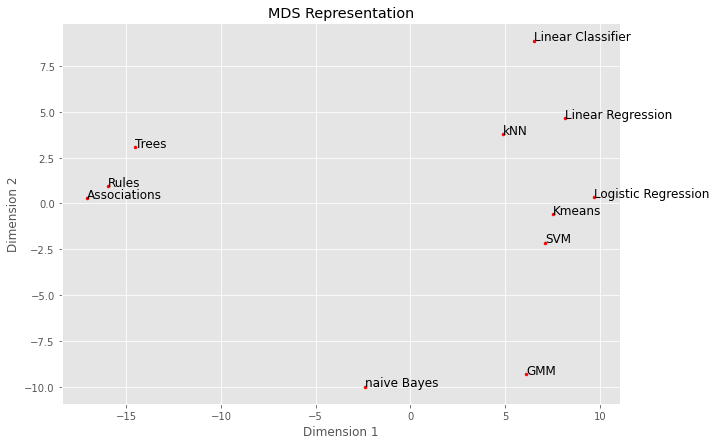

In [1]:
import numpy as np
import scipy.spatial.distance as dist
import scipy.linalg as linalg
import matplotlib.pyplot as plt

names = ['Trees', 'Rules', 'naive Bayes', 'kNN', 'Linear Classifier', 'Linear Regression',
         'Logistic Regression', 'SVM', 'Kmeans', 'GMM', 'Associations']

features = ['geom', 'stat', 'logic', 'group', 'grad', 'symb', 'real', 'sup', 'unsup', 'multi']

M = np.array([
    [1,0,3,3,0,3,2,3,2,3],  
    [0,0,3,3,1,3,2,3,0,2],  
    [1,3,1,3,1,3,1,3,0,3],  
    [3,1,0,2,2,1,3,3,0,3],  
    [3,0,0,0,3,1,3,3,0,0],  
    [3,1,0,0,3,0,3,3,0,1],  
    [3,2,0,0,3,1,3,3,0,0],  
    [2,2,0,0,3,2,3,3,0,0],  
    [3,2,0,1,2,1,3,0,3,1],  
    [1,3,0,0,3,1,3,0,3,1],  
    [0,0,3,3,0,3,1,0,3,1] 
])

plt.style.use('ggplot')

w1, w2, w3 = 5, 3, 1
W = np.array([w1, w1, w1, w2, w2, w3, w3, w3, w3, w3])
M = M * W

D = dist.pdist(M, metric='euclidean')
D = dist.squareform(D) 

def cmdscale(D):
    n = D.shape[0]
    H = np.eye(n) - np.ones((n, n)) / n
    B = -0.5 * H @ (D ** 2) @ H
    eigvals, eigvecs = linalg.eigh(B)
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    return eigvecs[:, :2] * np.sqrt(eigvals[:2]), eigvals

Y, eigvals = cmdscale(D)

plt.figure(figsize=(10,7))
plt.scatter(Y[:, 0], Y[:, 1], c='r', marker='.')
for i, name in enumerate(names):
    plt.text(Y[i, 0], Y[i, 1], name, fontsize=12)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('MDS Representation')
plt.show()

## 1.8 ML Methods Tree

```{mermaid}

graph TD;
    N0["grading"] -->|a bit| N1["logical"];
    N0 -->|a lot| N2["geometric"];

    N1 -->|yes| N11["supervised"];
    N1 -->|"not so\nmuch"| L12["naive\nBayes"]:::orange;
    N11 -->|no| L111["association\nrules"]:::red;
    N11 -->|"yes"| L112["trees & \nrules"]:::red;

    N2 -->|yes| N21["splitting"];
    N2 -->|"not\ncom-\npletely"| N22["supervised"];
    
    N21 -->|"some"| N212["supervised"];
    N21 -->|no| L211["linear\nclassifiers"]:::purple;
    N212 -->|no| L2121["K-means"]:::purple;
    N212 -->|yes| L2122["k-NN"]:::purple;

    N22 -->|no| L221["GMM"]:::orange;
    N22 -->|yes| L222["SVM"]:::purple;

    classDef red fill:#ff9999,stroke:#000,color:#000;
    classDef orange fill:#ffcc99,stroke:#000,color:#000;
    classDef purple fill:#cc99ff,stroke:#000,color:#000;

    class L111,L112 red;
    class L12,L221 orange;
    class L211,L2121,L2122,L222 purple;

```

## Diabetes

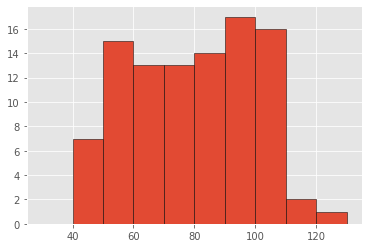

/home/ck22122/anaconda3/envs/clmr/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


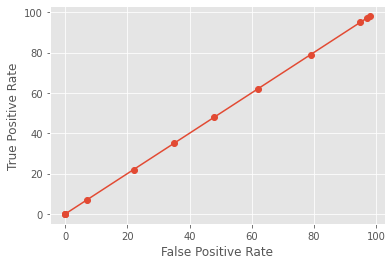

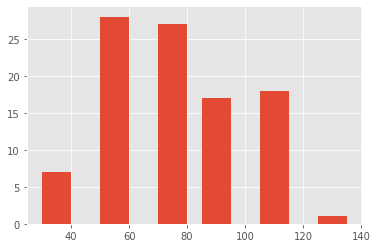

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mupos = 90
muneg = 70
sigma = 20
Pos = 50
Neg = 50

px = np.random.normal(mupos, sigma, Pos)
nx = np.random.normal(muneg, sigma, Neg)

bins = np.arange(muneg - 2 * sigma, mupos + 2 * sigma + 10, 10)

counts, xout = np.histogram(np.concatenate((px, nx)), bins)

plt.style.use('ggplot')

plt.figure(1)
plt.bar(xout[:-1], counts, width=10, align='edge',  edgecolor = "black")
plt.show()

counts = counts.reshape(-1, 1) 
p = counts[:, 0] / (counts[:, 0] + counts[:, 0])  

TP = 0
FP = 0
tp = [0]
fp = [0]

for i in range(len(counts)):
    tp.append(TP)
    fp.append(FP)
    TP += counts[i, 0]
    FP += counts[i, 0]

tp.append(TP)
fp.append(FP)

plt.figure(2)
plt.plot(fp, tp, marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

counts2 = np.zeros((6, 1))
counts2[0] = counts[0] + counts[1]
counts2[1] = counts[2] + counts[3]
counts2[2] = counts[4] + counts[5]
counts2[3] = counts[6]
counts2[4] = counts[7] + counts[8]
counts2[5] = counts[9] + counts[10] if len(counts) > 10 else counts[9]

bins2 = [35, 55, 75, 90, 110, 130]

plt.figure(3)
plt.bar(bins2, counts2.flatten(), width=10, align='center')
plt.show()

## 1.11 Kernel

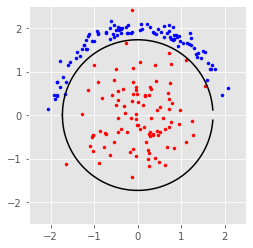

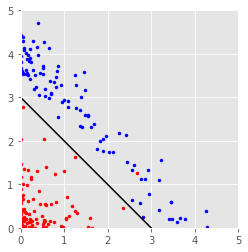

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

x = 4 * np.random.rand(100, 1) - 2
y = np.sqrt(4 - x ** 2)
xe = x + np.random.normal(0, 0.1, (100, 1))
ye = y + np.random.normal(0, 0.1, (100, 1))

mean = [0, 0]
cov = [[0.5, 0], [0, 0.5]]
p = np.random.multivariate_normal(mean, cov, 100)

xaxis = np.arange(-np.sqrt(3), np.sqrt(3), 0.01)

plt.figure(1)
plt.axis("square")
plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])
plt.scatter(p[:, 0], p[:, 1], color='r', marker='.')
plt.scatter(xe, ye, color='b', marker='.')
plt.plot(xaxis, np.sqrt(3 - xaxis ** 2), 'k-')
plt.plot(xaxis, -np.sqrt(3 - xaxis ** 2), 'k-')
plt.savefig("kernel-left.pdf")
plt.show()

plt.figure(2)
plt.axis("square")
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.scatter(xe ** 2, ye ** 2, color='b', marker='.')
plt.scatter(p[:, 0] ** 2, p[:, 1] ** 2, color='r', marker='.')
plt.plot([0, 3], [3, 0], color='black')
plt.savefig("kernel-right.pdf")
plt.show()